In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


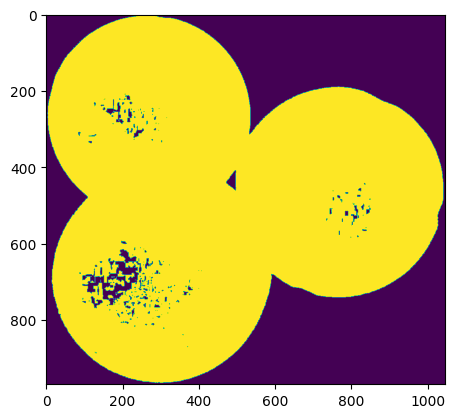

In [4]:
img = cv.imread('connectedtennis.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.imshow(thresh)

In [5]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [6]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

(Text(0.5, 1.0, 'Markers'), ([], []), ([], []))

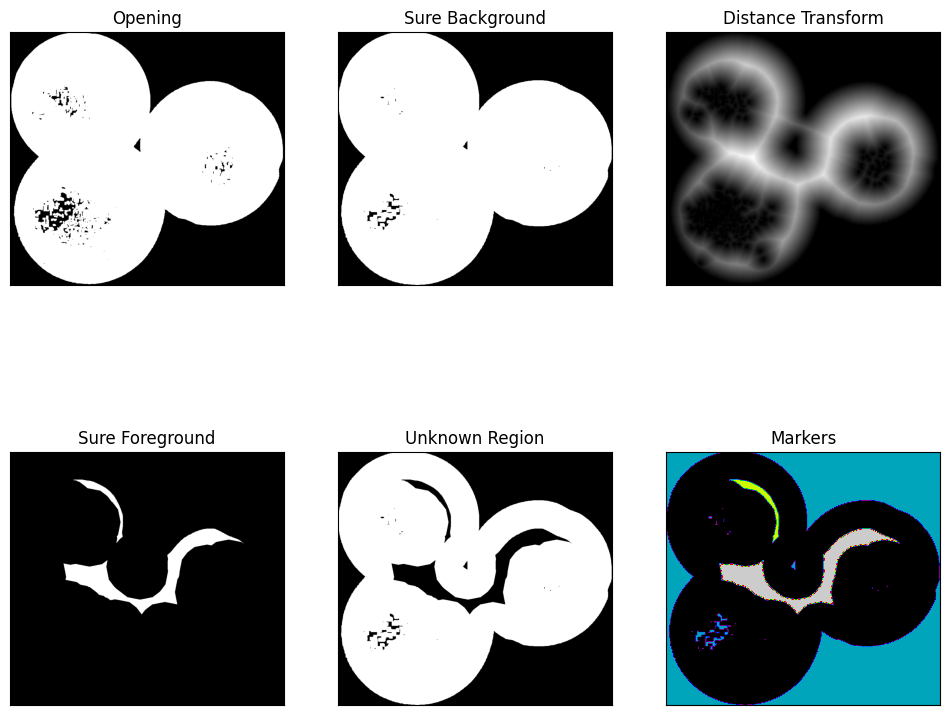

In [8]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(opening, 'gray', vmin=0, vmax=255)
plt.title('Opening'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(sure_bg, 'gray', vmin=0, vmax=255)
plt.title('Sure Background'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 3)
plt.imshow(dist_transform, 'gray')
plt.title('Distance Transform'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 4)
plt.imshow(sure_fg, 'gray', vmin=0, vmax=255)
plt.title('Sure Foreground'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(unknown, 'gray', vmin=0, vmax=255)
plt.title('Unknown Region'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6)
plt.imshow(markers, cmap='nipy_spectral')
plt.title('Markers'), plt.xticks([]), plt.yticks([])
